In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10,6)
sns.set_style("darkgrid")

In [3]:
vgsales = pd.read_csv('vgsales.csv')

In [4]:
# Print the first 10 rows
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [5]:
# Print the last five rows
vgsales.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.0,0.01
16594,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.0,0.01
16595,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.0,0.01
16596,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.0,0.01
16597,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.0,0.0,0.01


In [6]:
vgsales.shape

(16598, 11)

In [7]:
vgsales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [8]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
# Convert Year from float to string
vgsales.dropna(subset=['Year'], inplace=True)
vgsales['Year'] = vgsales['Year'].astype(int)

In [10]:
vgsales.isna().sum().sort_values(ascending=False)

Publisher       36
Rank             0
Name             0
Platform         0
Year             0
Genre            0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [11]:
vgsales.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Rank,16327.0,8292.87,4792.67,1.00,4136.50,8295.00,12441.50,16600.00
Year,16327.0,2006.41,5.83,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16327.0,0.27,0.82,0.00,0.00,0.08,0.24,41.49
EU_Sales,16327.0,0.15,0.51,0.00,0.00,0.02,0.11,29.02
JP_Sales,16327.0,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_Sales,16327.0,0.05,0.19,0.00,0.00,0.01,0.04,10.57
Global_Sales,16327.0,0.54,1.57,0.01,0.06,0.17,0.48,82.74


In [12]:
vgsales.describe(include='object').T

,count,unique,top,freq
Name,16327,11360,Need for Speed: Most Wanted,12
Platform,16327,31,DS,2133
Genre,16327,12,Action,3253
Publisher,16291,576,Electronic Arts,1339


## Sales Distribution by Region

#### Analysis of best selling games in all regions i.e North America, Europe, Japan, Other and World.

In [13]:
# Calculate total sales in each region
region_sales = vgsales.loc[:, 'NA_Sales':'Other_Sales'].sum().reset_index()
region_sales.rename(columns={'index' : 'Region', 0 : 'Sales'}, inplace=True)
region_sales

,Region,Sales
0,NA_Sales,4333.43
1,EU_Sales,2409.12
2,JP_Sales,1284.30
3,Other_Sales,789.01


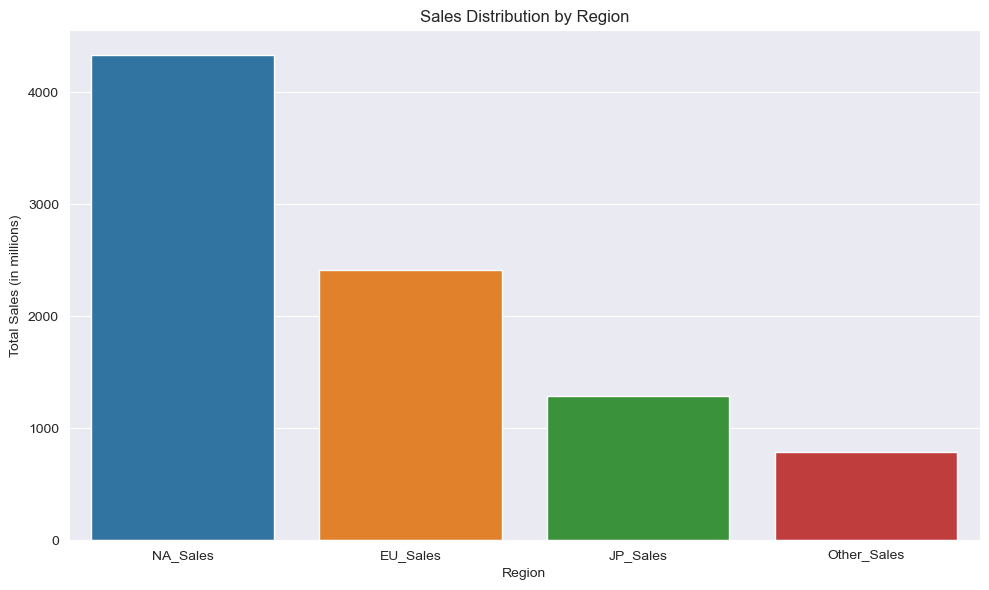

In [14]:
# Plot bar chart of best-selling games across region
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.title('Sales Distribution by Region')
plt.tight_layout()
plt.show()

+ Top 10 best selling games in the World.

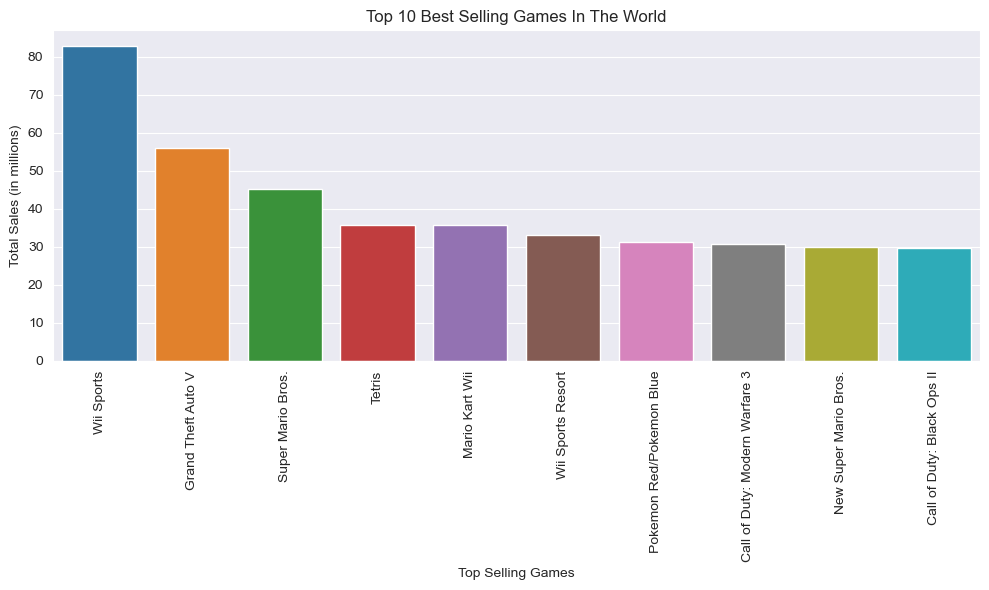

In [15]:
# The top 10 best-selling games
top_selling_games_global = vgsales.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot bar chart of best-selling games globally
sns.barplot(x='Name', y='Global_Sales', data=top_selling_games_global.head(10))
plt.xlabel('Top Selling Games')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 10 Best Selling Games In The World')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

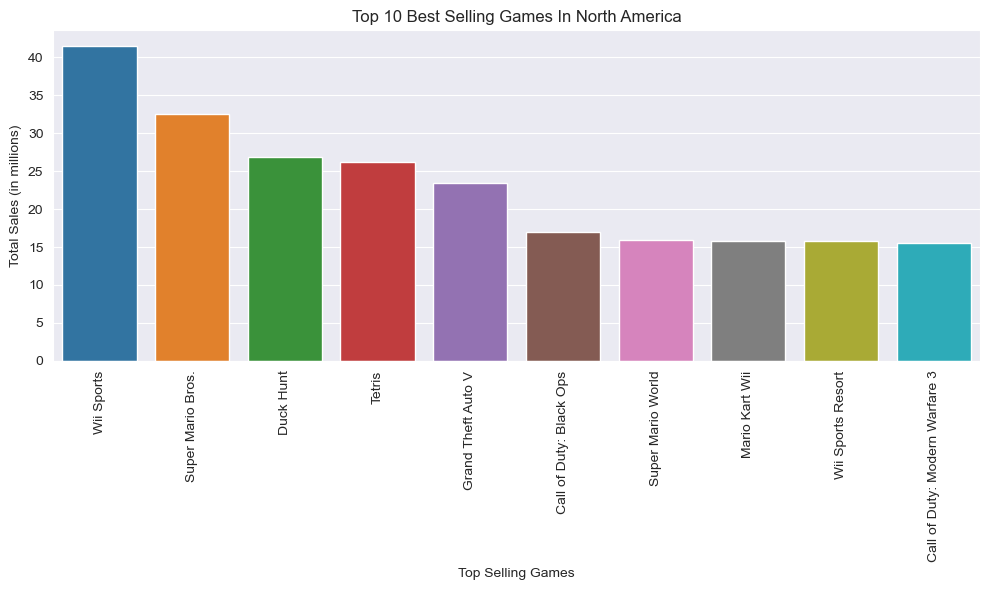

In [16]:
# The top 10 best-selling games in NA
top_selling_games_NA = vgsales.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot bar chart of best-selling games NA
sns.barplot(x='Name', y='NA_Sales', data=top_selling_games_NA.head(10))
plt.xlabel('Top Selling Games')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 10 Best Selling Games In North America')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

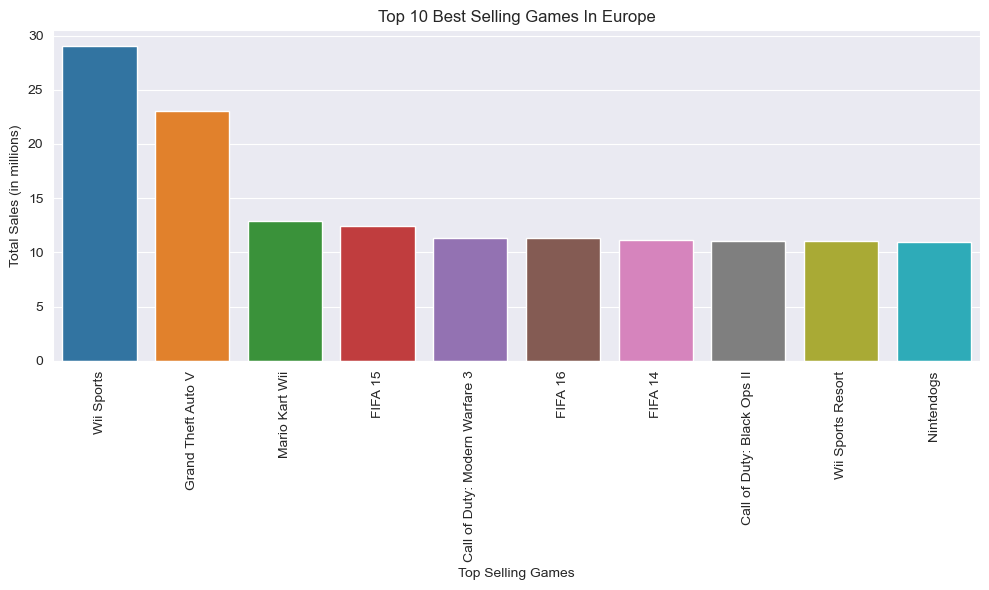

In [17]:
# The top 10 best-selling games in EU
top_selling_games_EU = vgsales.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot bar chart of best-selling games EU
sns.barplot(x='Name', y='EU_Sales', data=top_selling_games_EU.head(10))
plt.xlabel('Top Selling Games')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 10 Best Selling Games In Europe')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

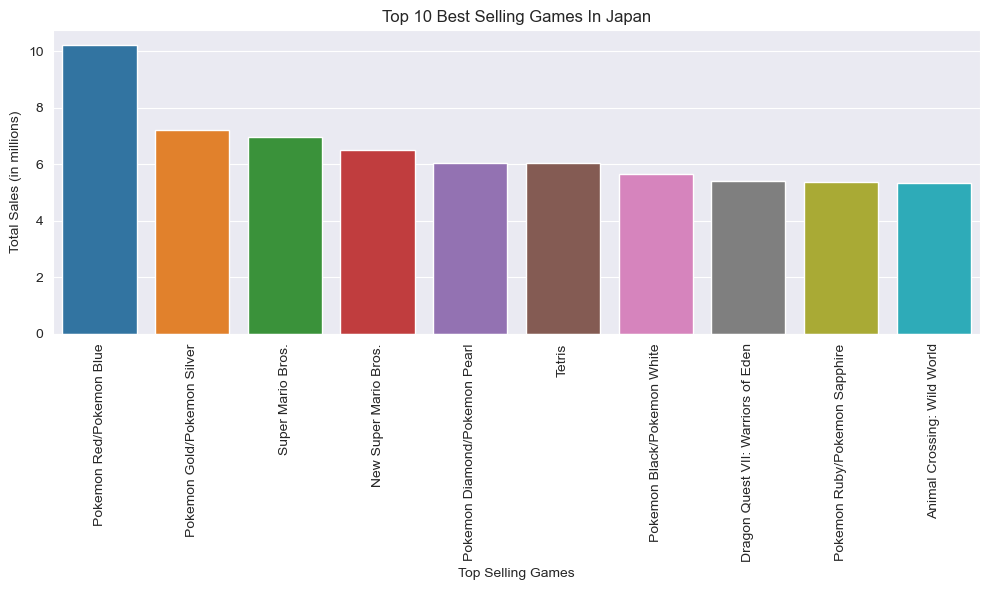

In [18]:
# The top 10 best-selling games in JP
top_selling_games_JP = vgsales.groupby('Name')['JP_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot bar chart of best-selling games JP
sns.barplot(x='Name', y='JP_Sales', data=top_selling_games_JP.head(10))
plt.xlabel('Top Selling Games')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 10 Best Selling Games In Japan')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

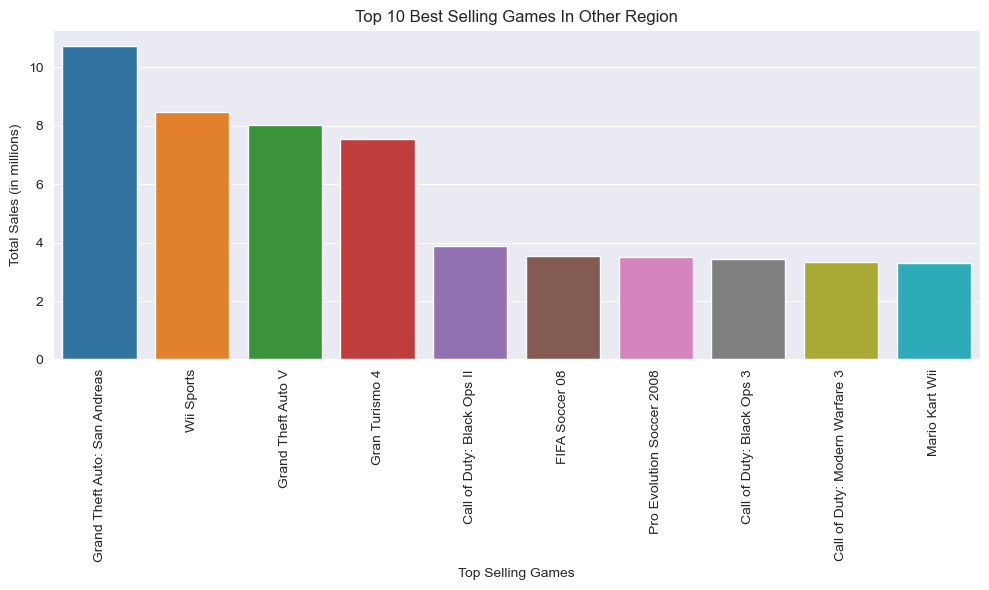

In [19]:
# The top 10 best-selling games in other
top_selling_games_other = vgsales.groupby('Name')['Other_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot bar chart of best-selling games other
sns.barplot(x='Name', y='Other_Sales', data=top_selling_games_other.head(10))
plt.xlabel('Top Selling Games')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 10 Best Selling Games In Other Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Genre Analysis

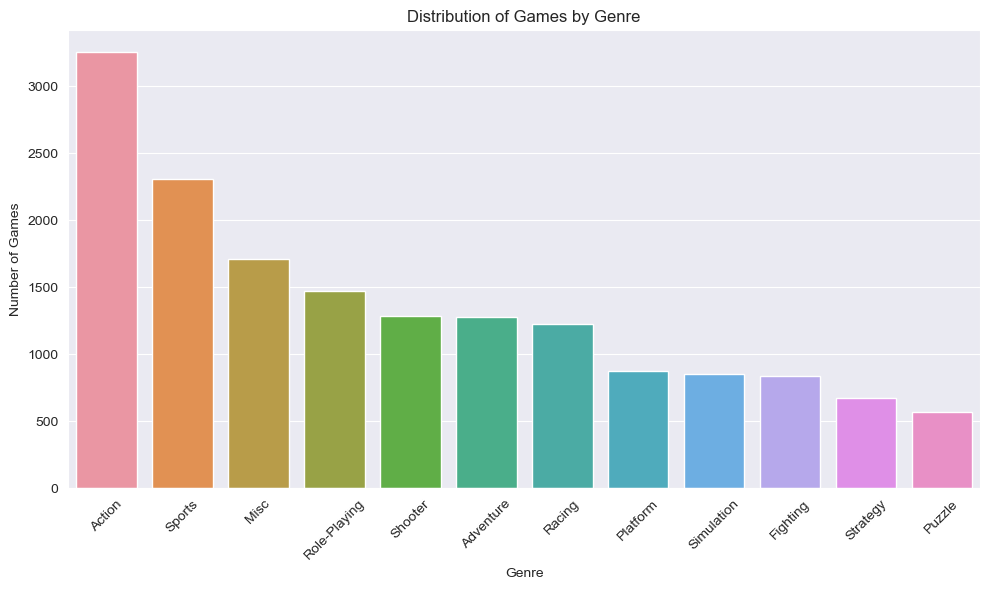

In [20]:
# Count the number of games in each genre
genre_counts = vgsales['Genre'].value_counts().reset_index().rename(columns={'index':'Genre', 'Genre':'Count'})
genre_counts

# Visualize the genre distribution
sns.barplot(data=genre_counts,x='Genre', y='Count')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Distribution of Games by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

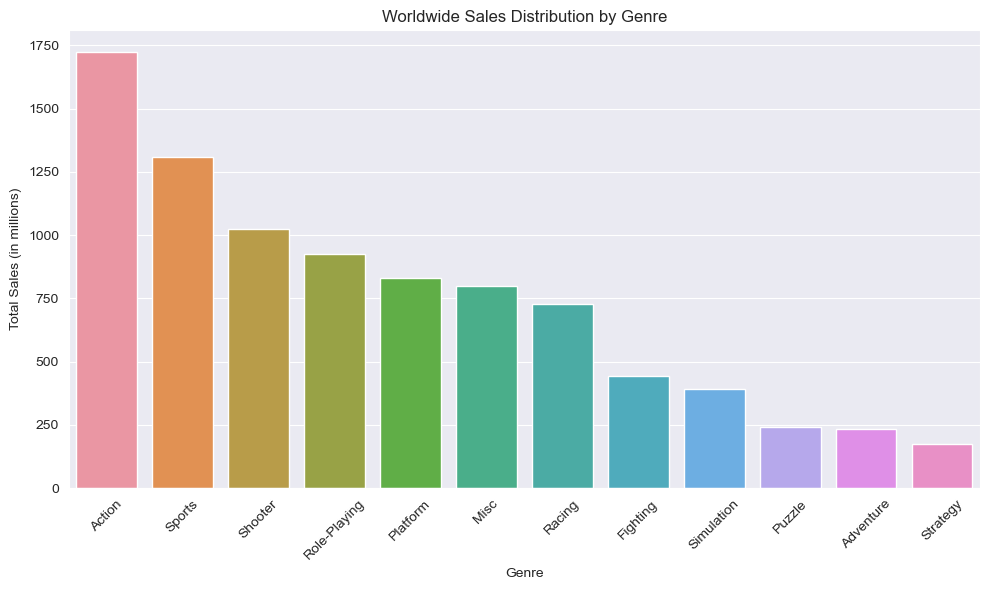

In [21]:
# The top selling games by genre
top_selling_games_genre = vgsales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot bar chart of best-selling Genre worldwide
sns.barplot(x='Genre', y='Global_Sales', data=top_selling_games_genre)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.title('Worldwide Sales Distribution by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Platform Performance

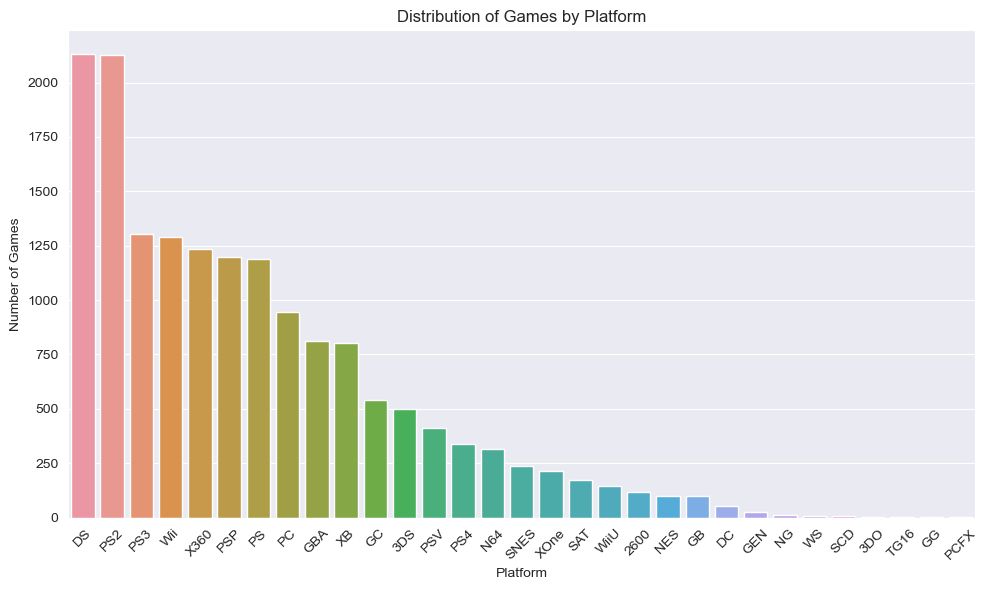

In [22]:
# Count the number of games in each platform
platform_counts = vgsales['Platform'].value_counts().reset_index().rename(columns={'index':'Platform', 'Platform':'Count'})

# Visualize the platform distribution
sns.barplot(data=platform_counts,x='Platform', y='Count')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.title('Distribution of Games by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

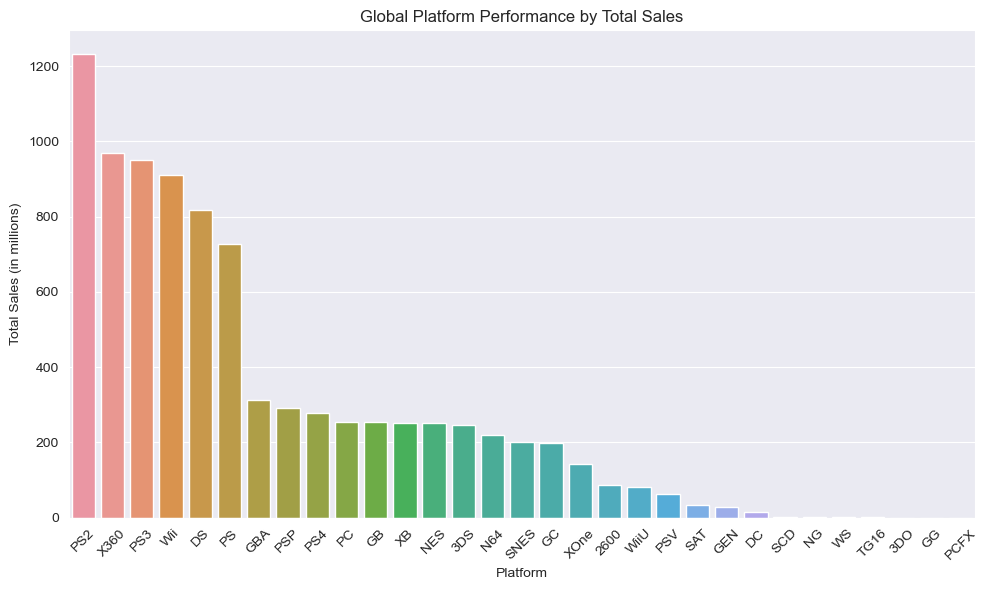

In [23]:
# Calculate total sales for each platform
platform_sales = vgsales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# Visualize platform performance
sns.barplot(data=platform_sales, x='Platform', y='Global_Sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Global Platform Performance by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Publisher Insights

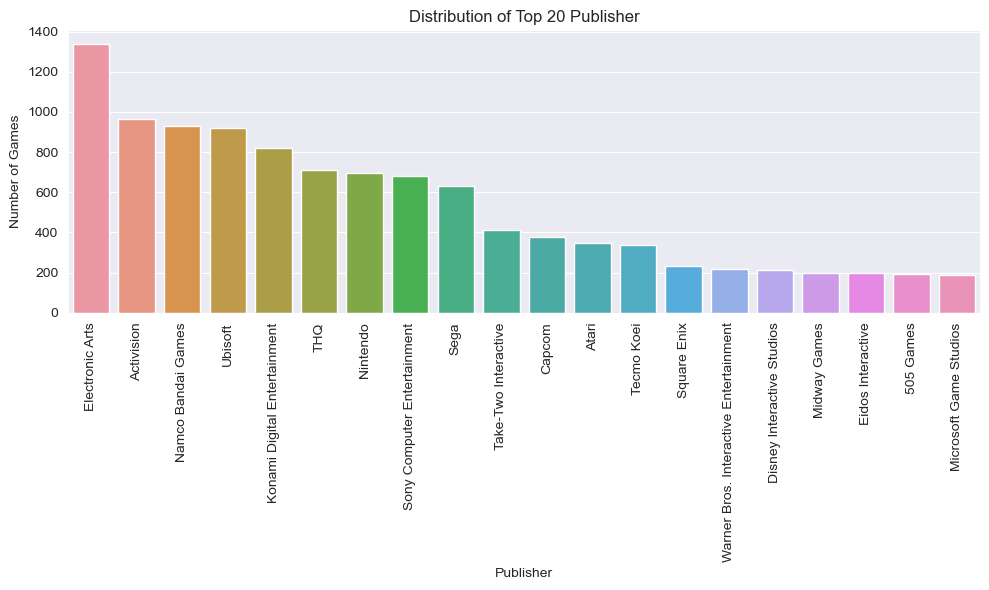

In [24]:
# Count the number of games in each publisher
publisher_counts = vgsales['Publisher'].value_counts().reset_index().rename(columns={'index':'Publisher', 'Publisher':'Count'})

# Visualize the publisher distribution
sns.barplot(data = publisher_counts.head(20), x = 'Publisher', y = 'Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.title('Distribution of Top 20 Publisher')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

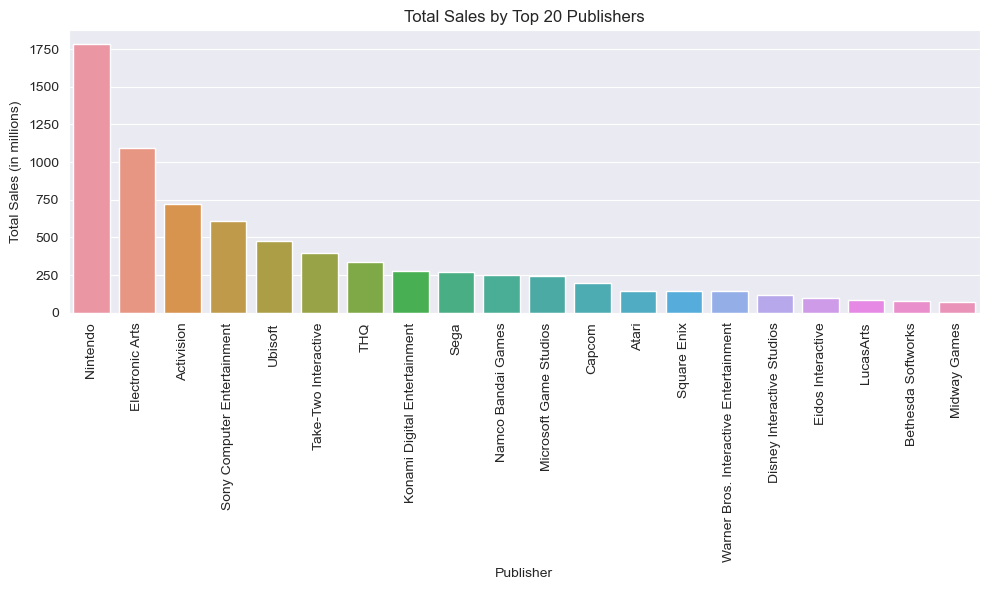

In [25]:
# Calculate total sales for each publisher
publisher_sales = vgsales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# Display the top 20 publishers with the highest total sales
top_publishers = publisher_sales.head(20)

# Visualize the publisher distribution
sns.barplot(data=top_publishers,x='Publisher', y='Global_Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales by Top 20 Publishers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Yearly Sales Trends

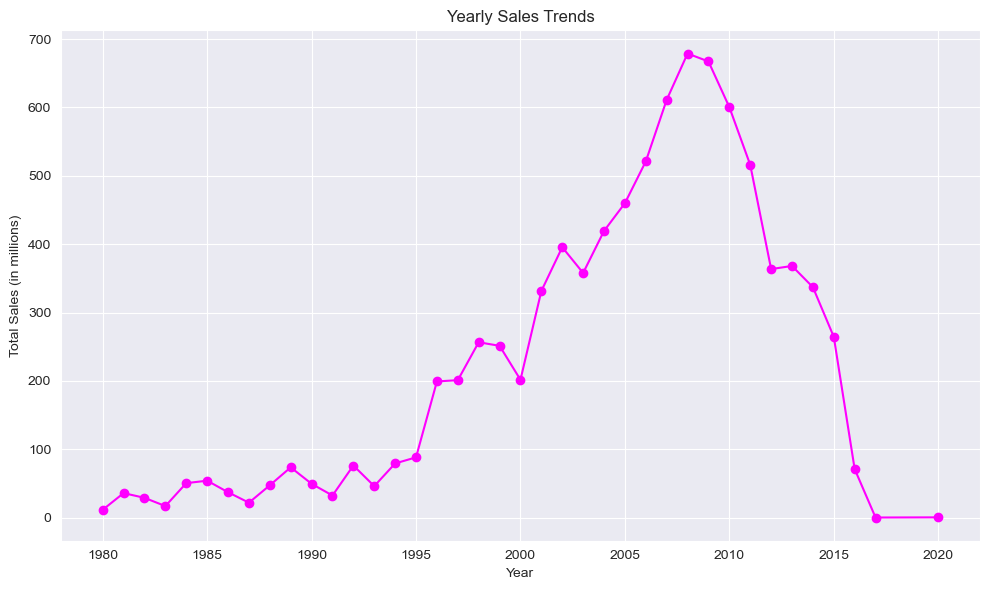

In [26]:
# Calculate total global sales for each year
yearly_sales = vgsales.groupby('Year')['Global_Sales'].sum()

# Visualize yearly sales trends 
yearly_sales.plot(kind='line', marker='o', color='magenta')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Yearly Sales Trends')
plt.tight_layout()
plt.show()

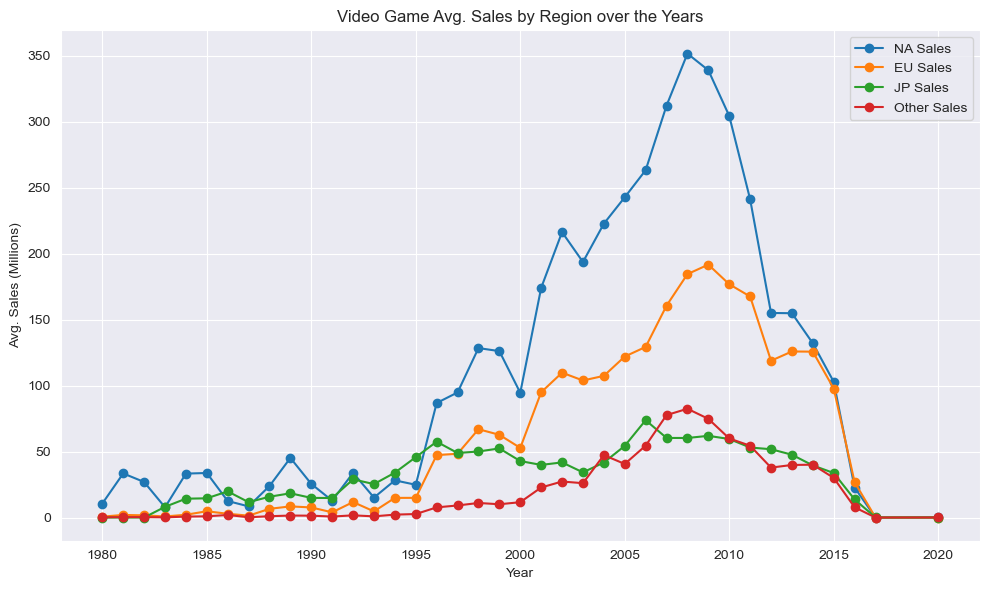

In [27]:
# Groupy Year by each region
year_sales = vgsales.groupby('Year')[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()

# Plotting the line chart
plt.plot(year_sales['Year'], year_sales['NA_Sales'], label='NA Sales', marker='o')
plt.plot(year_sales['Year'], year_sales['EU_Sales'], label='EU Sales', marker='o')
plt.plot(year_sales['Year'], year_sales['JP_Sales'], label='JP Sales', marker='o')
plt.plot(year_sales['Year'], year_sales['Other_Sales'], label='Other Sales', marker='o')
plt.xlabel('Year')
plt.ylabel('Avg. Sales (Millions)')
plt.title('Video Game Avg. Sales by Region over the Years')
plt.legend()
plt.tight_layout()
plt.show()

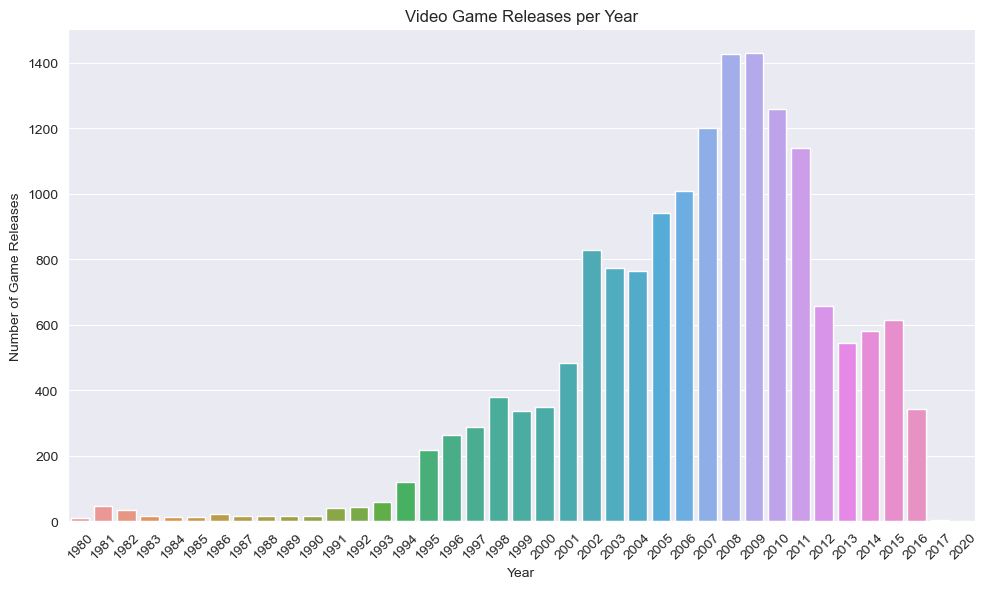

In [28]:
# Calculate the count of video game releases per year
year_count = vgsales.Year.value_counts()

# Plotting the bar chart
sns.barplot(x= year_count.index, y= year_count.values)

plt.xlabel('Year')
plt.ylabel('Number of Game Releases')
plt.title('Video Game Releases per Year')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

## Regional Preferences

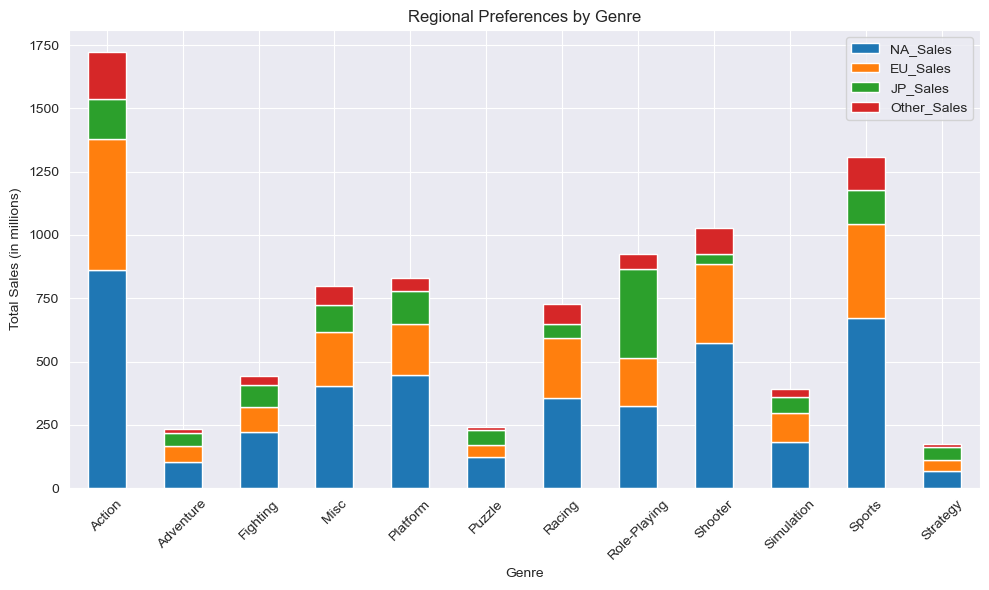

In [29]:
# Calculate total sales for each genre in each region
region_genre_sales = vgsales.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Visualize regional preferences using a stacked bar chart
region_genre_sales.plot(kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.title('Regional Preferences by Genre')
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.tight_layout()
plt.show()

## Correlation Analysis

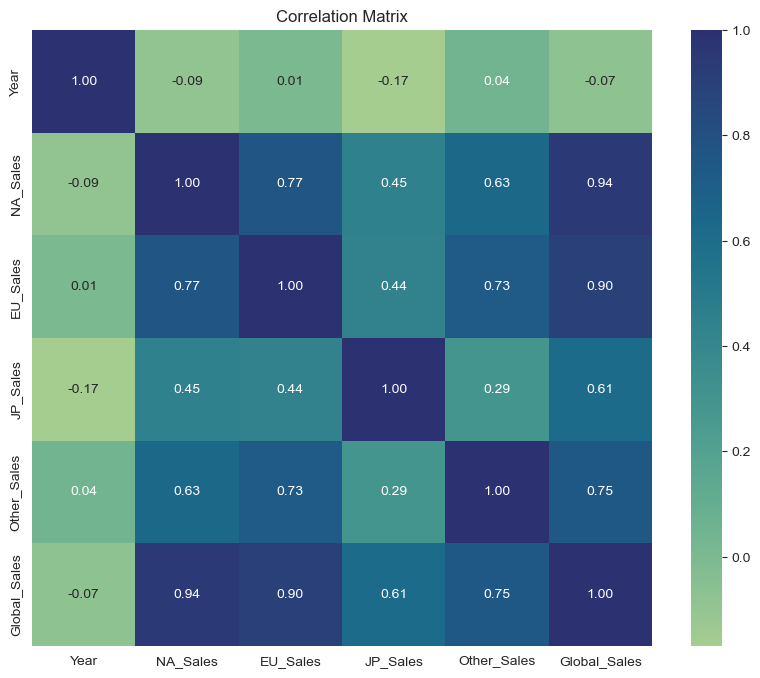

In [30]:
# Calculate correlation coefficients between relevant columns
correlation_matrix = vgsales[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Genre and Platform Trends Over Time

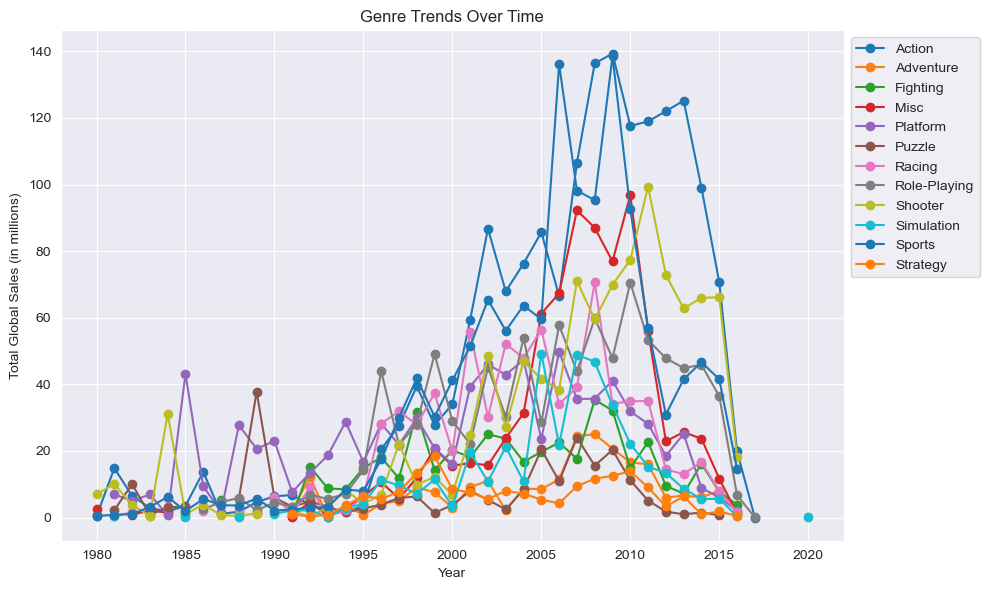

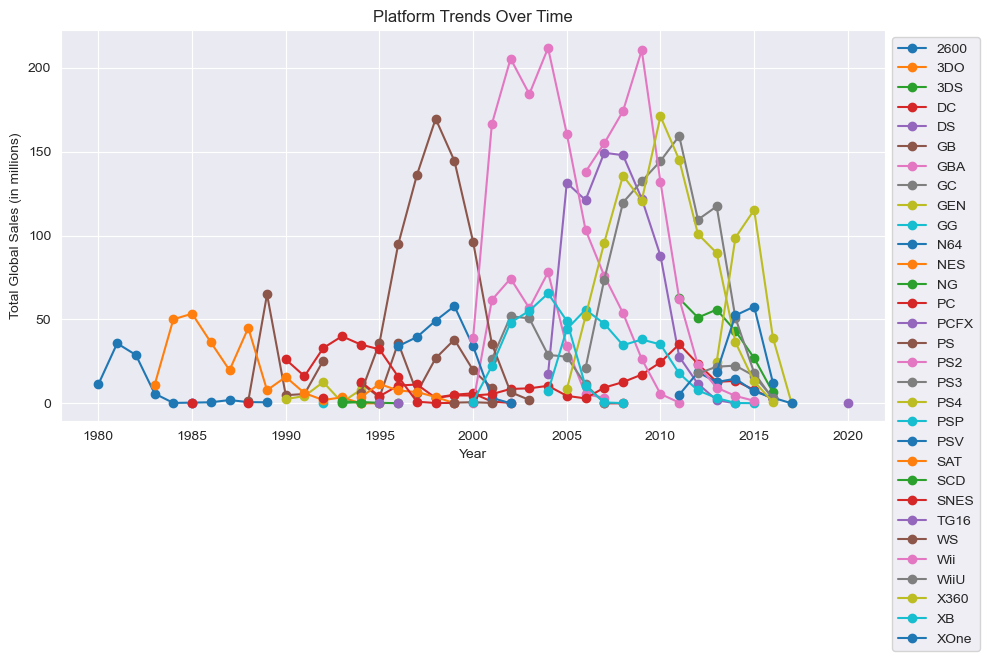

In [31]:
# Calculate total global sales for each genre and platform over the years
genre_trends = vgsales.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()
platform_trends = vgsales.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack()

# Visualize genre trends
genre_trends.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.title('Genre Trends Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Visualize platform trends
platform_trends.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.title('Platform Trends Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [32]:
# Convert relevant columns to numeric data types
vgsales['NA_Sales'] = pd.to_numeric(vgsales['NA_Sales'])
vgsales['EU_Sales'] = pd.to_numeric(vgsales['EU_Sales'])
vgsales['JP_Sales'] = pd.to_numeric(vgsales['JP_Sales'])
vgsales['Other_Sales'] = pd.to_numeric(vgsales['Other_Sales'])

# Calculate market share for publishers
publisher_sales = vgsales.groupby('Publisher')['Global_Sales'].sum()
total_global_sales = vgsales['Global_Sales'].sum()
publisher_market_share = (publisher_sales / total_global_sales) * 100
publisher_market_share = publisher_market_share.reset_index().rename(columns={'Global_Sales': 'Market Share'}).sort_values('Market Share', ascending=False)

# Calculate market share for genres
genre_counts = vgsales['Genre'].value_counts()
total_games = vgsales.shape[0]
genre_market_share = (genre_counts / total_games) * 100
genre_market_share = genre_market_share.reset_index().rename(columns={'index': 'Genre', 'Genre': 'Market Share'}).sort_values('Market Share', ascending=False)

In [33]:
# Display the results
publisher_market_share.head(20)

,Publisher,Market Share
359,Nintendo,20.230807
138,Electronic Arts,12.396206
21,Activision,8.178918
455,Sony Computer Entertainment,6.884980
524,Ubisoft,5.368715
493,Take-Two Interactive,4.527026
487,THQ,3.859706
275,Konami Digital Entertainment,3.158148
445,Sega,3.069036
347,Namco Bandai Games,2.875733


In [34]:
# Display the results
genre_market_share

,Genre,Market Share
0,Action,19.924052
1,Sports,14.111594
2,Misc,10.473449
3,Role-Playing,9.009616
4,Shooter,7.852024
5,Adventure,7.815275
6,Racing,7.509034
7,Platform,5.365346
8,Simulation,5.212225
9,Fighting,5.120353
